<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_04_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [9]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [10]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

## Dynamic Plot

In [11]:
import plotly.express as px

img = read_file(fname='house.tiff') / 255
fig = px.imshow(img, color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)

# 4. Convolution

**The `scipy` library**

In [12]:
from scipy.signal import convolve

Notes:
- numpy does not have 2-d convolution (only 1-d)
- `convolve` has a `mode` parameter with 3 values: `valid`, `full` and `same`

## 4.1 Convolution - valid mode

In [13]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='valid')

array([118, 154,  83, 195])

Note that the second vector (in2) is flipped (in order that it will be commutative):

In [14]:
convolve(in1=[4,1,2], in2=[14,50,10,11,13,40], mode='valid')

array([118, 154,  83, 195])

Code without using the built-in function:

In [15]:
in1 = np.array([14,50,10,11,13,40])
in2 = np.array([4,1,2])
print([np.dot(in1[i:i+len(in2)], np.flip(in2)) for i in range(0, len(in1)-len(in2)+1)])

[118, 154, 83, 195]


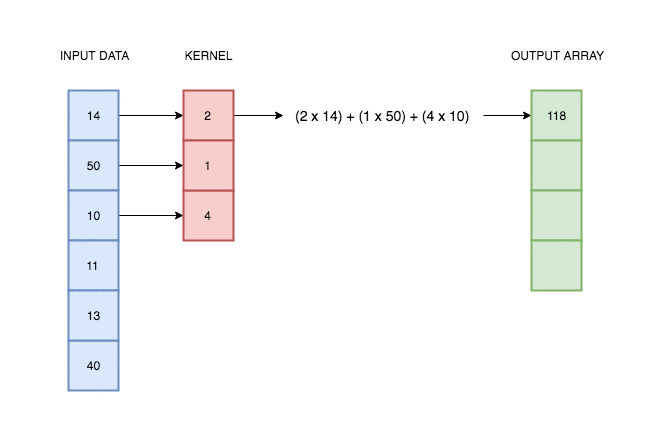

As can be seen above, the output array is smaller...

## 4.2 Full and Same modes

In `same` mode, the dimension of `in1` (length = 6) is maintained:

In [16]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='same')

array([214, 118, 154,  83, 195,  66])

In `full` mode, a zero padding is added to `in1`:

In [17]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='full')

array([ 56, 214, 118, 154,  83, 195,  66,  80])

##4.3 Cross-correlation

In [18]:
from scipy.signal import correlate

Cross-correlation (`correlate`) is similar to to convolution (`convolve`), but without flipping `in2` (the filter / kernel).

**Convolution is commutative**

In [19]:
print(convolve(in1=[1,2,3,4,5], in2=[6,7,8,9,10], mode='same'))
print(convolve(in1=[6,7,8,9,10], in2=[1,2,3,4,5], mode='same'))

[ 40  70 110 114 106]
[ 40  70 110 114 106]


**Cross-correlation is not commutative**

In [20]:
print(correlate(in1=[1,2,3,4,5], in2=[6,7,8,9,10], mode='same'))
print(correlate( in1=[6,7,8,9,10], in2=[1,2,3,4,5], mode='same'))

[ 56  90 130 110  86]
[ 86 110 130  90  56]


**Note: Convolutional Neural Networks (CNN) are using using cross-correlation, but calling it convolution...**

Note: the convolution operation:

$C=A⨂B$

##4.4 Mean filter

In [21]:
v = convolve(in1=[0,0,0,0,1,1,1,1], in2=[1/3,1/3,1/3], mode='same')
print([f'{a:.2f},' for a in v])

['0.00,', '0.00,', '0.00,', '0.33,', '0.67,', '1.00,', '1.00,', '0.67,']


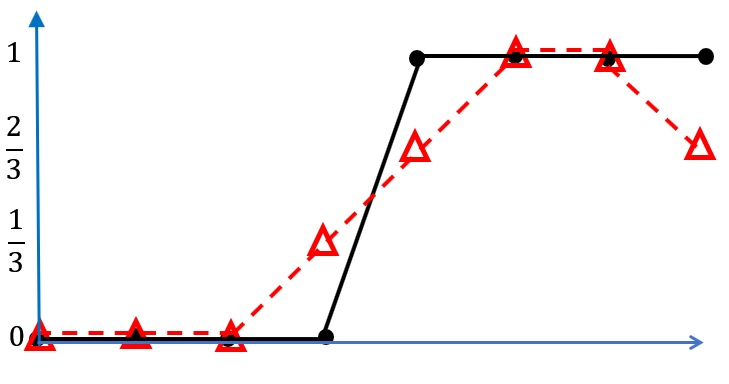

**2d convolution - Mean filter**

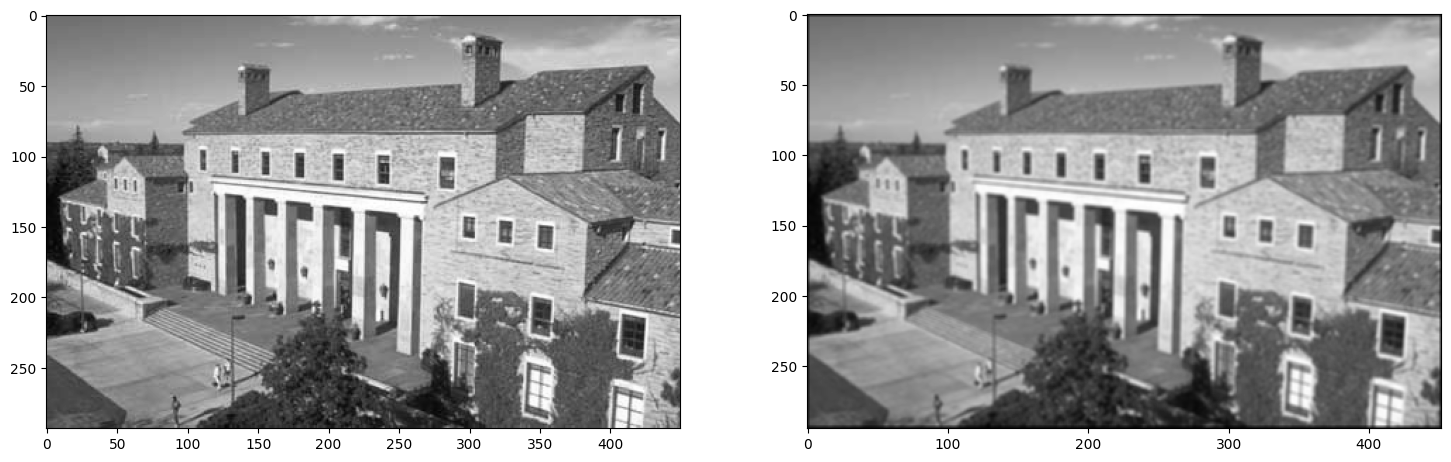

In [30]:
img = read_file(fname='house.tiff') / 255

FILTER_SIZE = 3
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter / filter.sum()
img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)

**Why did we devide by the sum of filter values?**

0.980053255870249


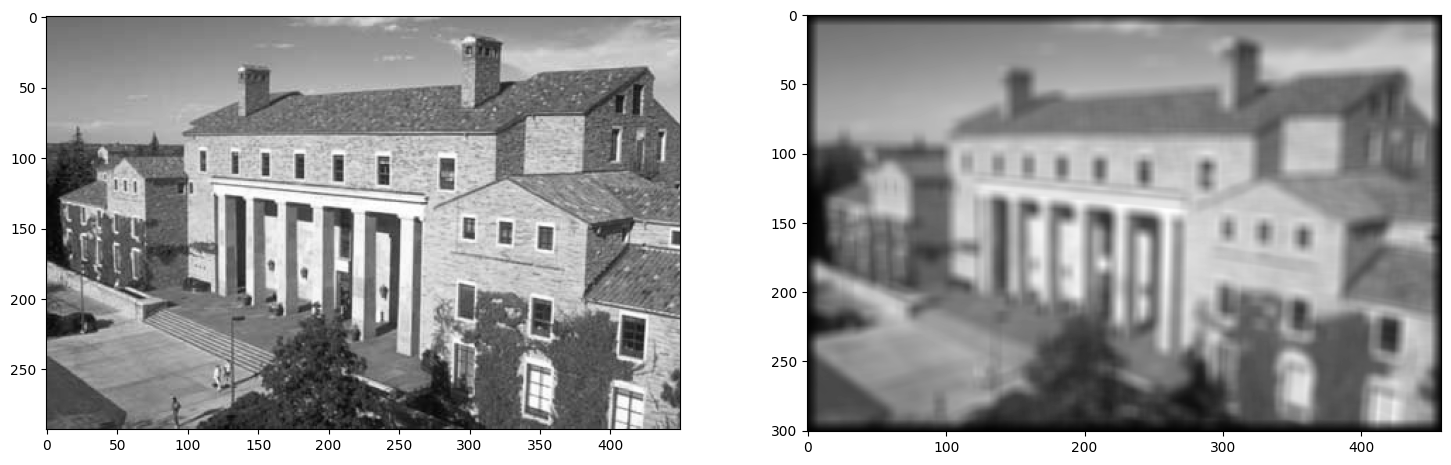

In [38]:
# here we devide:
FILTER_SIZE = 9
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter / filter.sum()

img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)
print(img1.max())

79.38431372549022


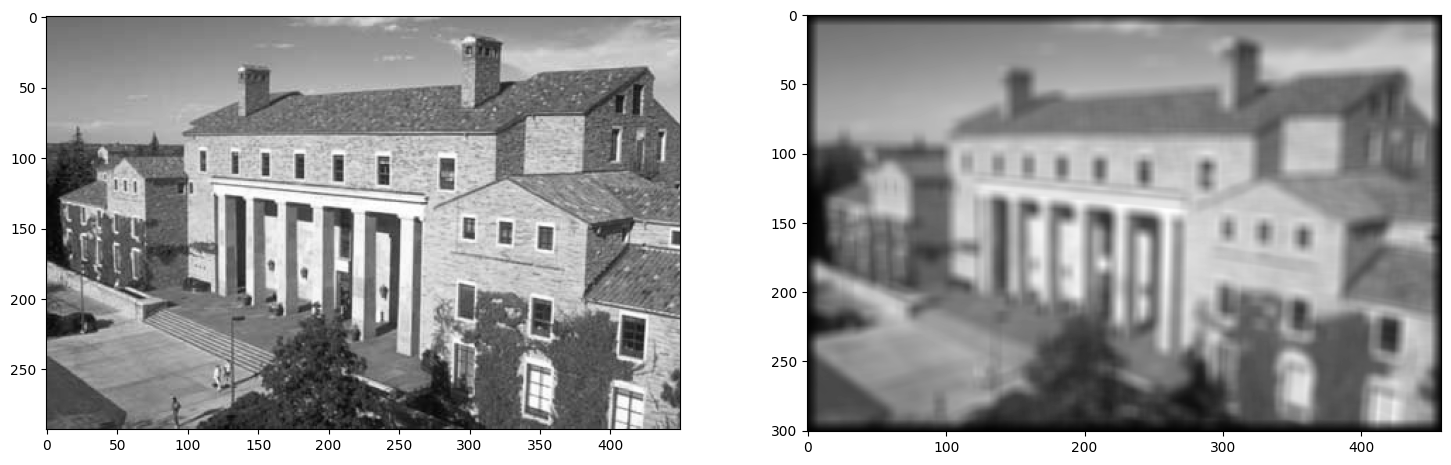

In [39]:
# here we don't devide:
FILTER_SIZE = 9
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter # / filter.sum()

img2 = convolve(in1=img, in2=filter)

plot_images(img, img2)
print(img2.max())

**Gaussian filter**

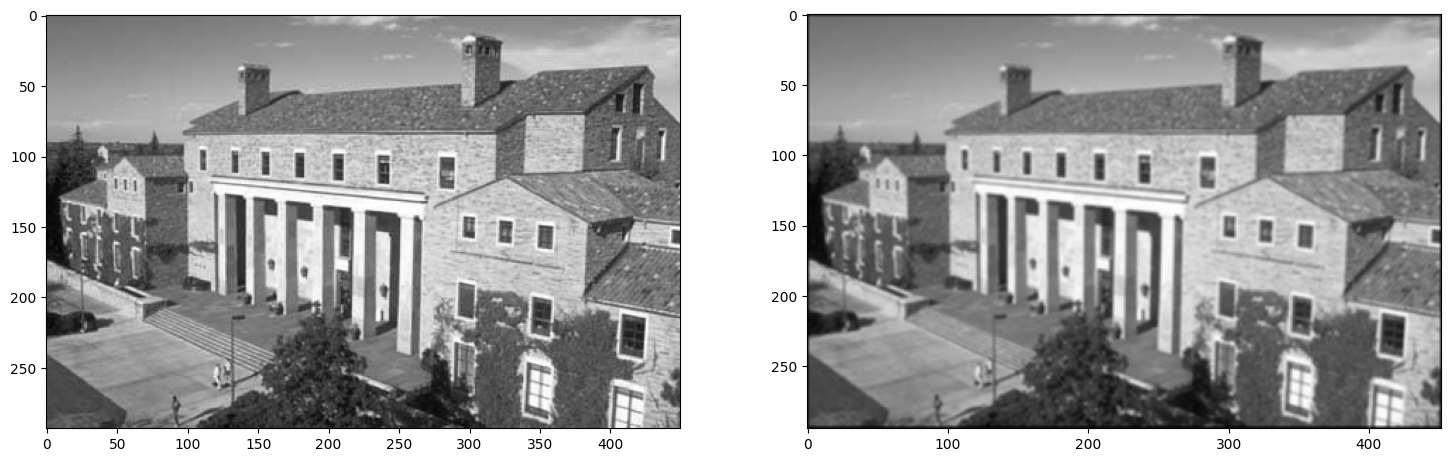

In [24]:
filter=np.array([[1,1,1],[1,2,1],[1,1,1]])
filter = filter / filter.sum()
img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)

##4.5 Edge Detector

In [25]:
v = convolve(in1=[0,0,0,0,1,1,1,1], in2=[-1,2,-1], mode='same')
print([f'{a:.2f},' for a in v])

['0.00,', '0.00,', '0.00,', '-1.00,', '1.00,', '0.00,', '0.00,', '1.00,']


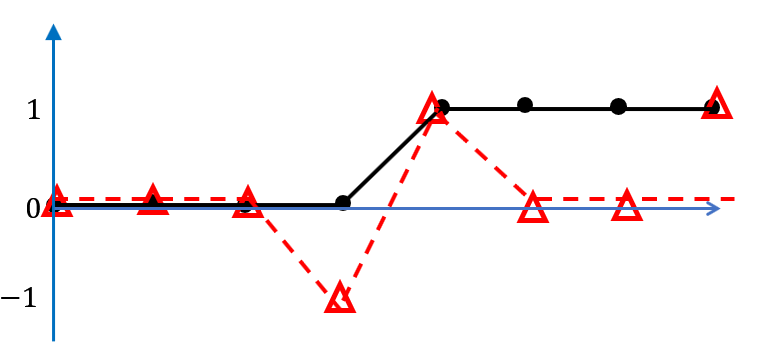

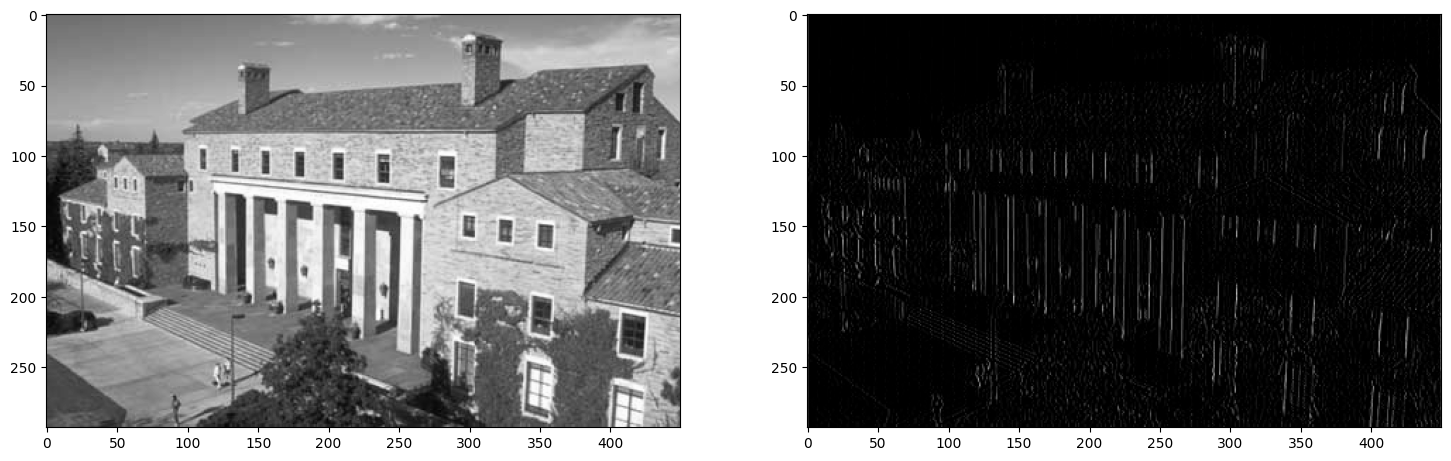

In [26]:
filter=np.array([[-1,2,-1]])
img1 = convolve(img, filter, 'same')
img1 = np.clip(img1, a_min=0, a_max=1)
plot_images(img, img1)